In [2]:
#Predict the Price of the Uber ride from a given pickup point to the agreed drop-off location.Perform following tasks :
#1.Pre-process the dataset
#2.Identify outliers
#3.Check correlation
#4.Implement linear regression and random forest regression models.
#5.Evaluate the models and compare thier respective scores like R2,RMSE,etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('uber.csv')

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.shape

(200000, 9)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
#REMOVE NULL VALUES
df.dropna(axis=0,inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
#NOW THERE ARE NO NULL VALUES

In [11]:
#WE WANT TO DROP TWO COLUMNS "UNNAMED AND KEY"

In [12]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [13]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
#WE NEED TO CONVERT pickup_datetime variable from object to "datetime" datatype

In [15]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
#WE WILL EXTRACT FEATURES FROM THE TIME VARIABLE 

In [17]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
             day=df.pickup_datetime.dt.day,
             month=df.pickup_datetime.dt.month,
             year=df.pickup_datetime.dt.year,
             dayofweek=df.pickup_datetime.dt.dayofweek)

In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [19]:
df=df.drop(['pickup_datetime'],axis=1)

In [20]:
#FUNCTION TO CALCULATE DISTANCE TRAVELLED 
from math import *
def distance_travelled(longitude1,latitude1,longitude2,latitude2):
    travel_dist=[]
    for pos in range(len(longitude1)):
        lan1,lat1,lan2,lat2=map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_lan=lan2-lan1
        dist_lat=lat2-lat1
        a=sin(dist_lat/2)**2+cos(lat1)*cos(lat2)*sin(dist_lan/2)**2
        #radius of earth is 6371 km
        c=asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist

In [21]:
df['Dist_travelled']=distance_travelled(df.pickup_longitude.to_numpy(),df.pickup_latitude.to_numpy(),df.dropoff_longitude.to_numpy(),df.dropoff_latitude.to_numpy())

In [23]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,Dist_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,0.841661
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,1.228795
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,2.518189
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,0.830842
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,2.237725
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.056105
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,0.937525
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,6.425160
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,1.769858


In [24]:
#IDENTIFY OUTLIERS

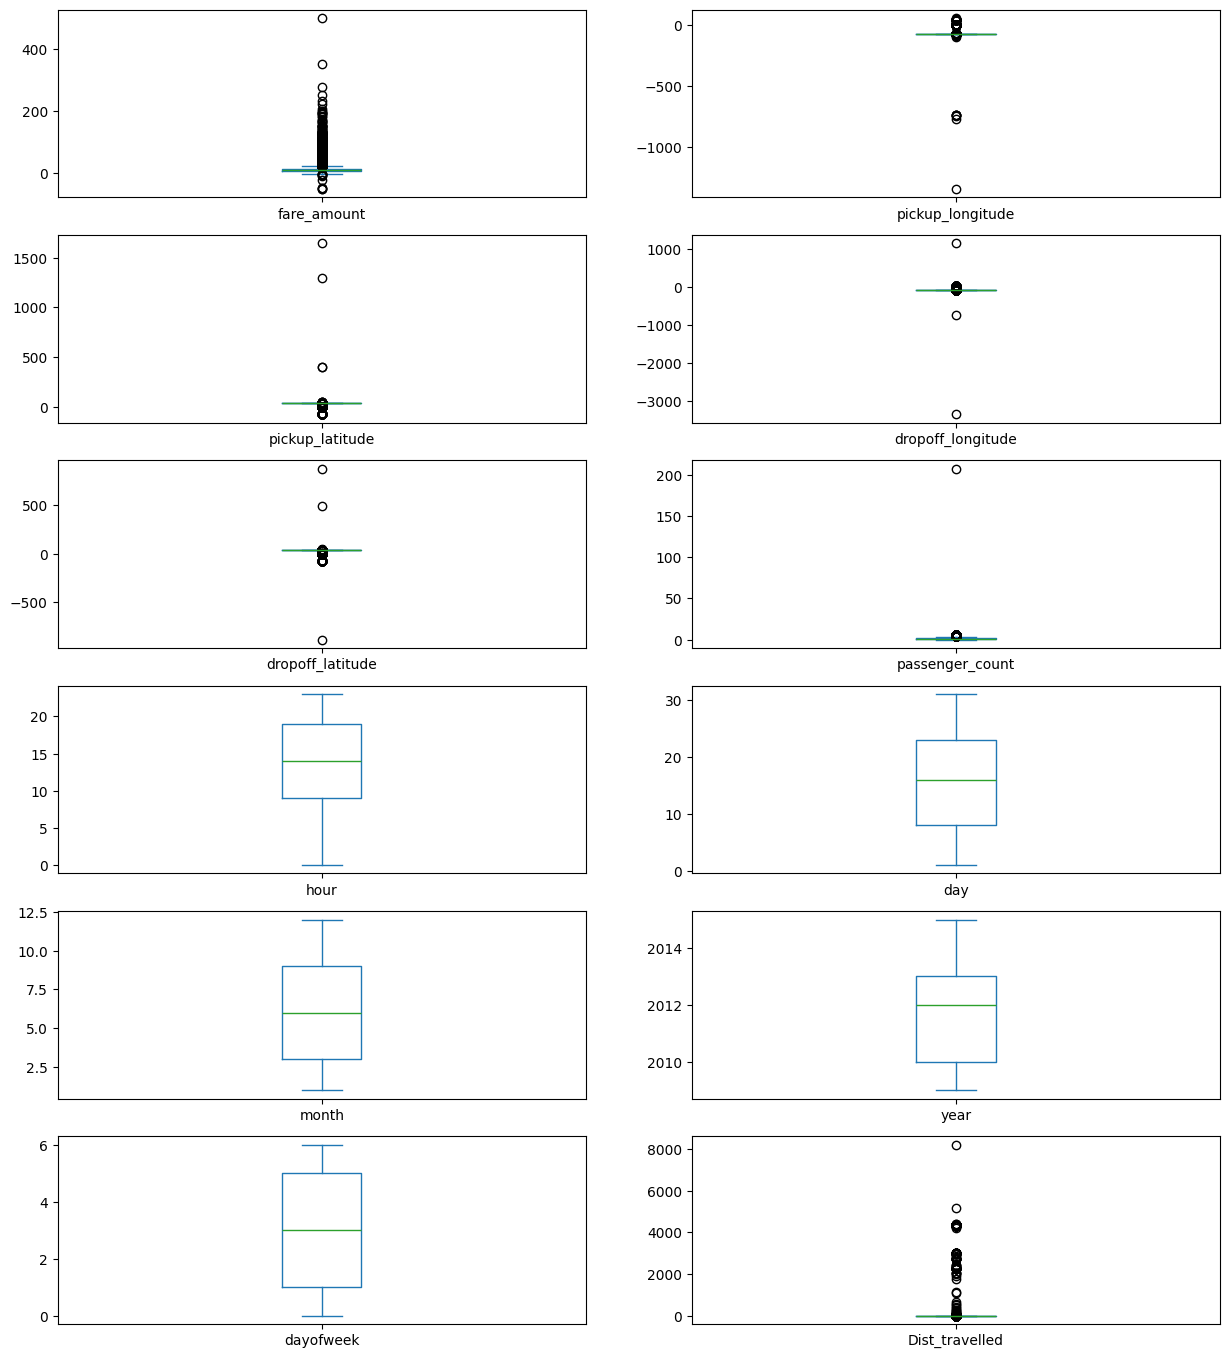

In [25]:
#df.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

In [26]:
#OUTLIERS DETECTED IN FAREAMOUNT AND DISTANCE_TRAVELLED
#REMOVING OUTLIERS


In [27]:
'''def remove_outlier(df1 , col): 
    Q1 = df1[col].quantile(0.25) 
    Q3 = df1[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_whisker = Q1-1.5*IQR 
    upper_whisker = Q3+1.5*IQR 
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker) 
    return df1 
def treat_outliers_all(df1 , col_list): 
    for c in col_list: 
        df1 = remove_outlier(df , c) 
    return df1 
df = treat_outliers_all(df , df.iloc[: , 0::])'''


'def remove_outlier(df1 , col): \n    Q1 = df1[col].quantile(0.25) \n    Q3 = df1[col].quantile(0.75) \n    IQR = Q3 - Q1 \n    lower_whisker = Q1-1.5*IQR \n    upper_whisker = Q3+1.5*IQR \n    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker) \n    return df1 \ndef treat_outliers_all(df1 , col_list): \n    for c in col_list: \n        df1 = remove_outlier(df , c) \n    return df1 \ndf = treat_outliers_all(df , df.iloc[: , 0::])'

In [28]:
def remove_outliers(df1,c):
    Q1=df1[c].quantile(0.25)
    Q3=df1[c].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    df1[c]=np.clip(df1[c],lower_whisker,upper_whisker)
    return df1


def treat_outliers(df1,col):
    for c in col:
        df1=remove_outliers(df1,c)
    return df1

df=treat_outliers(df,df.iloc[:,0::])

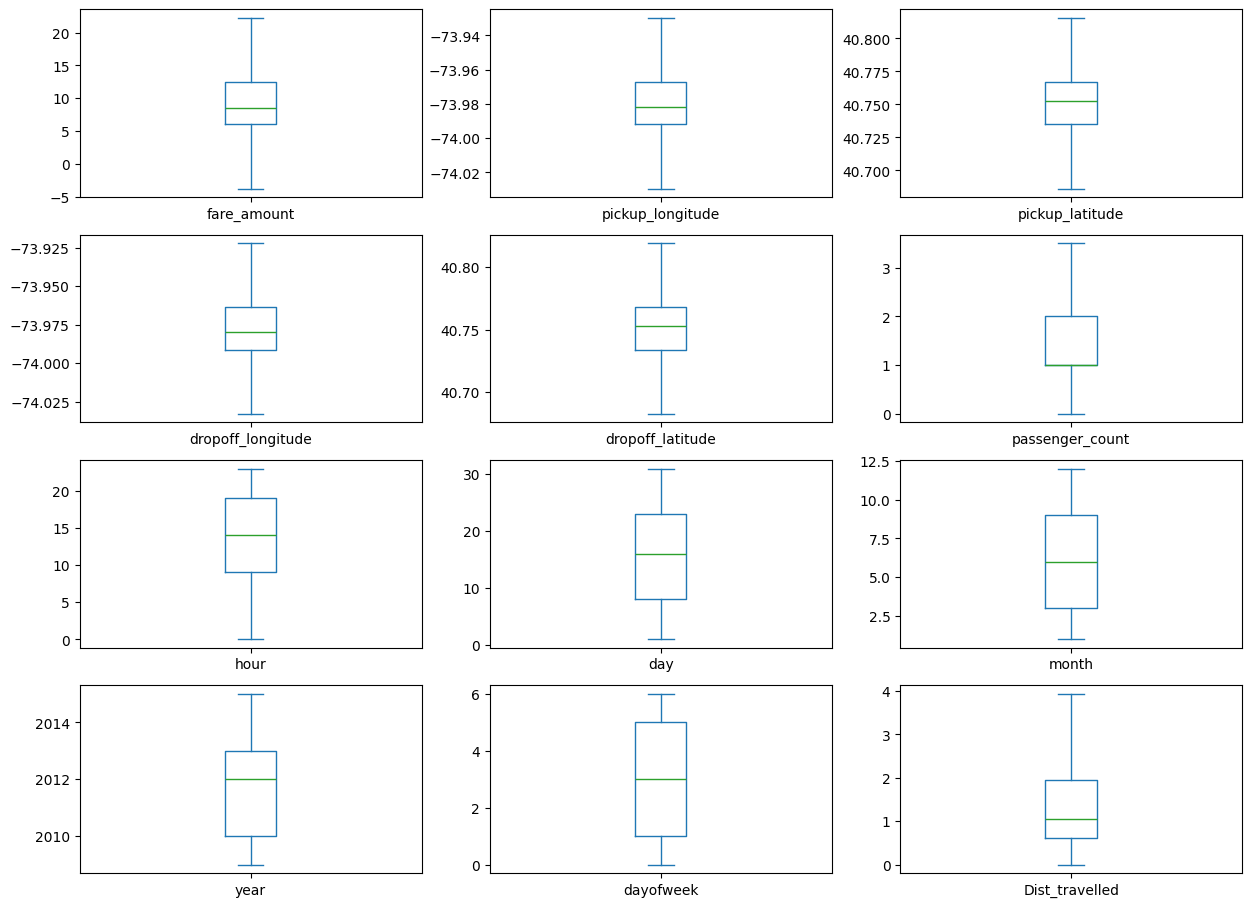

In [29]:
df.plot(kind = "box",subplots = True,layout = (7,3),figsize=(15,20))
plt.show()

In [30]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,Dist_travelled
fare_amount,1.000000,0.154053,-0.110857,0.218681,-0.125874,0.015798,-0.023605,0.004552,0.030815,0.141271,0.013664,0.844369
pickup_longitude,0.154053,1.000000,0.259496,0.425622,0.073313,-0.013202,0.011590,-0.003194,0.001168,0.010193,-0.024645,0.098074
pickup_latitude,-0.110857,0.259496,1.000000,0.048887,0.515736,-0.012879,0.029691,-0.001544,0.001561,-0.014247,-0.042304,-0.046825
dropoff_longitude,0.218681,0.425622,0.048887,1.000000,0.245670,-0.009304,-0.046560,-0.004008,0.002392,0.011347,-0.003337,0.186533
dropoff_latitude,-0.125874,0.073313,0.515736,0.245670,1.000000,-0.006329,0.019765,-0.003498,-0.001191,-0.009595,-0.031932,-0.038873
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.020260,0.002699,0.010353,-0.009743,0.048542,0.009729
hour,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,1.000000,0.004664,-0.003924,0.002162,-0.086956,-0.038348
day,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,0.004664,1.000000,-0.017358,-0.012165,0.005609,0.003080
month,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,-0.003924,-0.017358,1.000000,-0.115860,-0.008785,0.011626
year,0.141271,0.010193,-0.014247,0.011347,-0.009595,-0.009743,0.002162,-0.012165,-0.115860,1.000000,0.006116,0.024270


<Axes: >

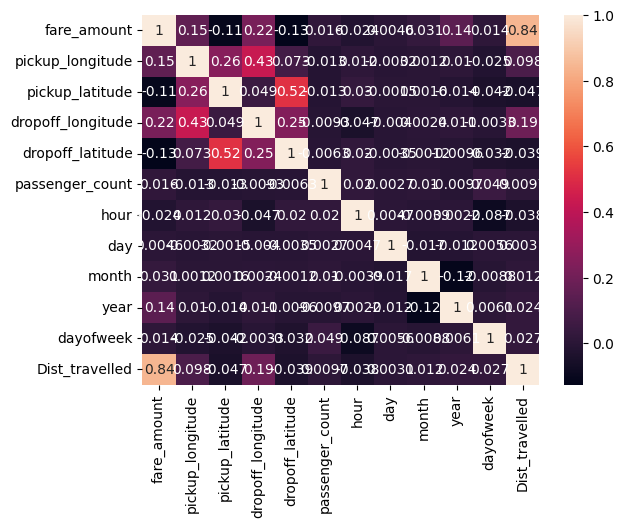

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
#LINEAR REGRESSION AND RANDOM FOREST

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  float64
 6   hour               199999 non-null  int32  
 7   day                199999 non-null  int32  
 8   month              199999 non-null  int32  
 9   year               199999 non-null  int32  
 10  dayofweek          199999 non-null  int32  
 11  Dist_travelled     199999 non-null  float64
dtypes: float64(7), int32(5)
memory usage: 16.0 MB


In [34]:
df_x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','Dist_travelled']]
df_y=df['fare_amount']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=1)

In [38]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,Dist_travelled
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,0.841661
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,1.228795
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,2.518189
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,0.830842
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,2.237725
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.056105
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,0.937525
199997,22.25,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,3.932545
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,1.769858


In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred_value=reg.predict(x_test)
print(y_pred_value)

[ 9.32438271  6.59548726  7.27141666 ... 10.61411168  3.51825885
 20.0593125 ]


In [41]:
from sklearn.ensemble import RandomForestRegressor
#Here n_estimators means number of trees you want to build before making the prediction
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
y_pred_rf=rf.predict(x_test)
print(y_pred_value)

[ 9.32438271  6.59548726  7.27141666 ... 10.61411168  3.51825885
 20.0593125 ]


In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

In [46]:
lr_r2 = r2_score(y_test, y_pred_value)
rf_r2 = r2_score(y_test, y_pred_rf)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_value))
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Linear Regression R-squared:", lr_r2)
print("Random Forest R-squared:", rf_r2)
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest RMSE:", rf_rmse)


Linear Regression R-squared: 0.7483593528956259
Random Forest R-squared: 0.8089653292611511
Linear Regression RMSE: 2.7311015682393642
Random Forest RMSE: 2.379597763387684


In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Compare the scores
print("Linear Regression R-squared:", lr_r2)
print("Random Forest R-squared:", rf_r2)
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Linear Regression MAE:", lr_mae)
print("Random Forest MAE:", rf_mae)
'''